In [197]:
import pandas as pd

sms = pd.read_csv("H:/datasets/spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [198]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [199]:
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [200]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5,0,'Message Length')

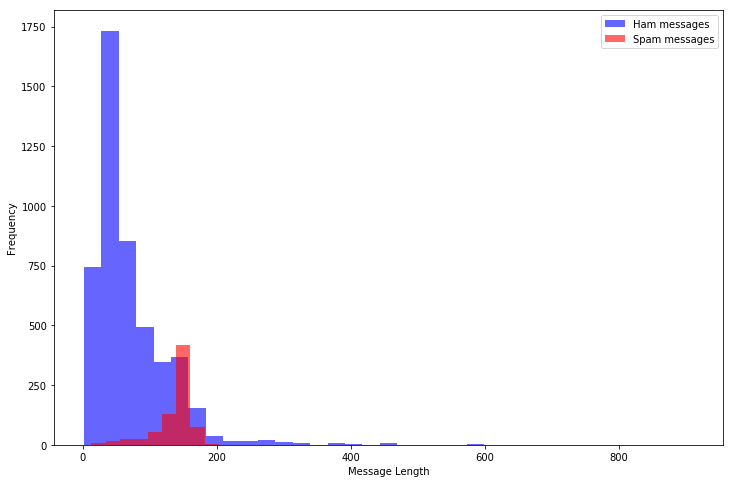

In [201]:
# 导入matplotlib工具包
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [202]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [203]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
print(len(stopword))

179


In [204]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation   标点符号
    2. Remove all stopwords     
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') 
    # 检查字符是否在里面
    nopunc = [char for char in mess if char not in string.punctuation]

    # 将所有的list中的数据集进行拼接.
    nopunc = ''.join(nopunc)
    
    # 将文本中包含的停用词进行去除
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [205]:
sms['clean_msg'] = sms.message.apply(text_process)
sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah dont think goes usf lives around though


In [206]:
stopwords.words('english')[:20] #停用词中前20个词语

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [207]:
#划分数据集 训练级X，测试集Y  以三比一进行划分

from sklearn.model_selection import train_test_split
X = sms.clean_msg
Y = sms.label_num
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
Y_test
X_train,X_test,Y_train,y_testSVM= train_test_split(X,Y,random_state=1)
X_train,X_test,Y_train,y_testTREE = train_test_split(X,Y,random_state=1)
X_train,X_test,Y_train,y_testFOREST = train_test_split(X,Y,random_state=1)

(4179,)
(1393,)
(4179,)
(1393,)


In [208]:
#CountVectorizer类会将文本中的词语转换为词频矩阵，例如矩阵中包含一个元素a[i][j]，它表示j词在i类文本下的词频。
from sklearn.feature_extraction.text import CountVectorizer

# 实例化矢量化器
vect = CountVectorizer()

# 等效地：将拟合和变换合并为一个步骤
X_train_dtm = vect.fit_transform(X_train)

# 检查文档术语矩阵
X_train_dtm

<4179x8001 sparse matrix of type '<class 'numpy.int64'>'
	with 35546 stored elements in Compressed Sparse Row format>

In [209]:
# 将测试数据（使用适合的词汇表）转换为文档术语矩阵
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x8001 sparse matrix of type '<class 'numpy.int64'>'
	with 10217 stored elements in Compressed Sparse Row format>

In [210]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_dtm = tfidf_transformer.fit_transform(X_train_dtm)
X_test_dtm = tfidf_transformer.transform(X_test_dtm)   

In [211]:
X_test_dtm

<1393x8001 sparse matrix of type '<class 'numpy.float64'>'
	with 10217 stored elements in Compressed Sparse Row format>

In [212]:
#使用sklearn中的LogisticRegression加载逻辑回归模型。solver参数决定了我们对逻辑回归损失函数的优化方法。

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logreg = LogisticRegression(solver='liblinear')
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(min_samples_split=7)
rfc = RandomForestClassifier(n_estimators=31)

# 使用LR模型训练
%time logreg.fit(X_train_dtm, Y_train)
# 使用SVM模型训练
%time svc.fit(X_train_dtm, y_trainSVM)
# 使用决策树模型训练
%time dtc.fit(X_train_dtm, y_trainTREE)
# 使用随机森林模型训练
%time rfc.fit(X_train_dtm, y_trainFOREST)

Wall time: 24.3 ms
Wall time: 759 ms
Wall time: 282 ms
Wall time: 565 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [213]:
# 对X_test_dtm进行类预测
y_pred_class = logreg.predict(X_test_dtm)
# 使用SVM模型预测
svc_y_pred_class = svc.predict(X_test_dtm)
# 使用决策树预测
dtc_y_pred_class = dtc.predict(X_test_dtm)
# 使用SVM模型预测
rfc_y_pred_class = rfc.predict(X_test_dtm)

In [214]:
#模型p评估
y_pred_prob = logreg.predict_proba(X_test_dtm)
# 输出前10条样本输出概率
y_pred_prob[40:50]

array([[0.9263702 , 0.0736298 ],
       [0.9879738 , 0.0120262 ],
       [0.96366175, 0.03633825],
       [0.94910872, 0.05089128],
       [0.17019489, 0.82980511],
       [0.97182048, 0.02817952],
       [0.89839584, 0.10160416],
       [0.95099085, 0.04900915],
       [0.95785929, 0.04214071],
       [0.9563407 , 0.0436593 ]])

In [215]:
from sklearn import metrics
# 逻辑回归准确率
logreg_acc = metrics.accuracy_score(Y_test, y_pred_class)
logreg_acc



0.9619526202440776

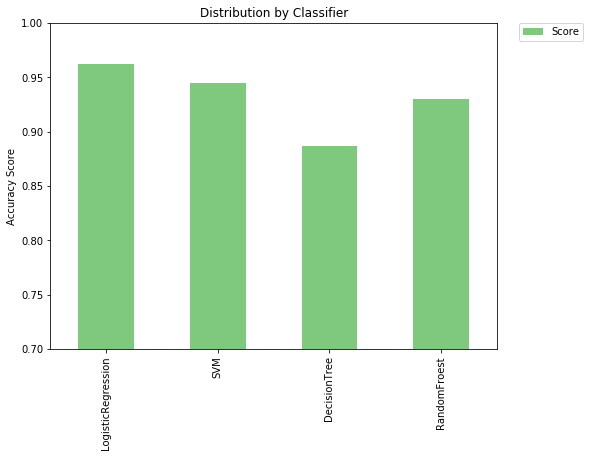

In [216]:
import numpy as np
# 将不同算法的结果准确率可视化
pred_scores = [('LogisticRegression', [logreg_acc]), 
               ('SVM', [svm_acc]), 
               ('DecisionTree', [dtc_acc]), 
               ('RandomFroest', [rfc_acc])]
df = pd.DataFrame.from_dict(dict(pred_scores),orient='index', columns=['Score'])

df.plot(kind='bar', ylim=(0.7,1.0), figsize=(8,6), align='center', colormap="Accent")
plt.xticks(np.arange(4), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [217]:
test_case = X_test[40:50]
Y_test[40:50]

574     0
1272    0
255     0
4992    0
2582    1
5144    0
1973    0
3242    0
359     0
1791    0
Name: label_num, dtype: int64

In [218]:
case_test_dtm = tfidf_transformer.transform(vect.transform(test_case))
# 使用逻辑回归模型进行预测
y_pred_class = logreg.predict(case_test_dtm)
y_pred_class

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)